#### Problem Definition/Goal Identification

Goal: Train a model that predicts whether someone is diabetic

#### Data Ingestion

##### Import Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_auc_score, confusion_matrix
# for scaling the data
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import recall_score
#ann
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import sklearn.metrics as metrics

In [63]:
# load the dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Analysis of the Dataset

In [64]:
# get information about the features/properties
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
# get all stastical analysis of the dataset
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
relevant_statistical_analysis = diabetes.describe().drop(['count', 'std','25%','50%','75%'], axis='rows')
relevant_statistical_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Metric-by-metric validation

1. Glucose (Plasma glucose concentration)
- Zero value possible? No
- Why: Glucose is essential for brain function. A true value of 0 mg/dL is incompatible with life.
- Realistic human minimum: ~40 mg/dL (2.2 mmol/L) 
2. Blood Pressure (Diastolic)
- Zero value possible? No
- Why: Blood pressure of 0 mmHg means no circulation.
- Realistic human minimum: ~40–50 mmHg (diastolic)
3. Skin Thickness (Triceps skinfold)
- Zero value possible? No
- Why: Humans always have subcutaneous tissue.
- Realistic human minimum: ~5 mm. Athletes or extremely lean individuals may approach this, but never 0
4. Insulin (Serum insulin)
- Zero value possible? No
- Why: Even in Type 1 diabetes, there is usually some detectable insulin unless lab limits truncate it.
- Realistic human minimum: ~2–3 μU/mL
5. BMI (Body Mass Index)
- Zero value possible? No
- Why: BMI is derived from weight and height; 0 would imply no mass.
- Realistic human minimum: ~10–12 kg/m² → extreme starvation


In [67]:
# checking pregnancy frequency distribution
diabetes['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

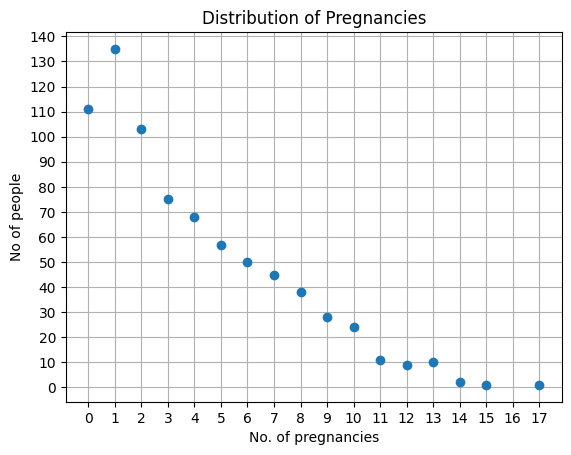

In [68]:
diabetes_features = list(diabetes.columns)
plt.plot(diabetes['Pregnancies'].value_counts(),'o')
plt.title("Distribution of Pregnancies")
plt.xlabel("No. of pregnancies")
plt.ylabel("No of people")
plt.xticks(np.arange(0,diabetes['Pregnancies'].max()+1, 1))
plt.yticks(np.arange(0,diabetes['Pregnancies'].value_counts()[1]+10, 10))
plt.grid(True)
plt.savefig("Pregnancy Frequency Line Graph")
plt.show()

#### Data Pre-processing
Notes: Humans can't have zero, blood pressure, skin thickness, insulin levels, and BMI

In [69]:
# checking for null values

# replace zero with NaN where zero is an invalid output (refer to metric-by-metric validation section)
dataset_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes[dataset_columns] = diabetes[dataset_columns].replace(0, np.nan)

# checking for columns with null values
diabetes.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### The plan is to compare results of each model based on the type of dataset they will be trained on

In [70]:
# creating a dataframe where all null values from "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" are dropped
diabetes_drop_nan = diabetes.dropna()
diabetes_drop_nan.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

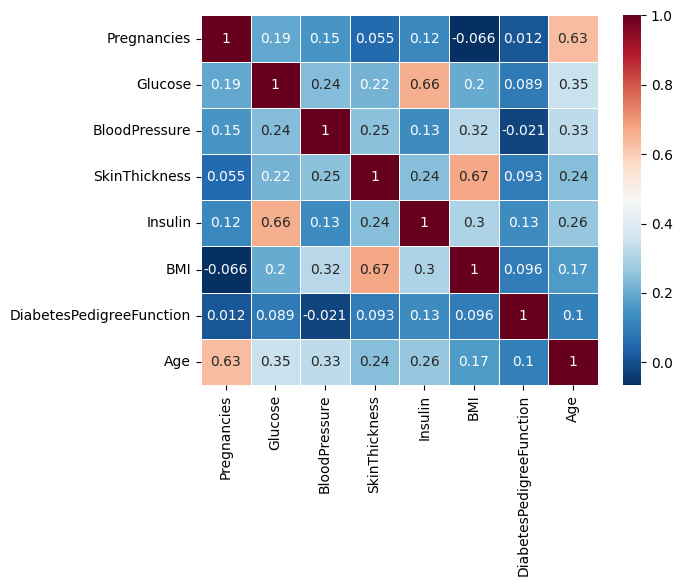

In [71]:
# correlation analysis
# There's no need to drop any feature in my view, as all of them have a correlation value below 0.7
diabetes_drop_nan_features = diabetes_drop_nan.drop('Outcome', axis=1)
spearmanCorrelation = diabetes_drop_nan_features.corr(method='spearman', numeric_only=True)

sb.heatmap(spearmanCorrelation,
           xticklabels=spearmanCorrelation.columns,
           yticklabels=spearmanCorrelation.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

In [72]:
# replacing null values in "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" with mean
diabetes_swap_for_mean = diabetes.copy()

for column in dataset_columns:
    diabetes_swap_for_mean[column] = diabetes_swap_for_mean[column].fillna(diabetes_swap_for_mean[column].mean())

diabetes_swap_for_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
# replacing null values in "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" with median
diabetes_swap_for_median = diabetes.copy()

for column in dataset_columns:
    diabetes_swap_for_median[column] = diabetes_swap_for_median[column].fillna(diabetes_swap_for_median[column].median())

diabetes_swap_for_median.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Segragation

In [74]:
# separate features from target/outcome feature
X = diabetes_drop_nan_features
print("======================================================================")
print(X)
print("======================================================================")
# assign target to y
y = diabetes_drop_nan['Outcome']
print("======================================================================")
print(y)
print("======================================================================")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  
3                       0.167   21  
4                       2.288   33  


In [75]:
# train, test, split
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("X_train Shape:", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", Y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape: (313, 8)
X_test Shape:  (79, 8)
y_train Shape:  (313,)
y_test Shape:  (79,)


##### Feature Scaling

Importance: Many machine learning algorithms are sensitive to the scale of the input features e.g. Algorithms that rely on distance metrics (like KNN and SVM) or gradient-based optimization (like Logistic Regression and Gradient Boosting) can be affected by features with different scales.
<br>
<br>
Impact of Unscaled Features: If features like Glucose (values in the range of 0-200) and BMI (values in the range of 0-70) are not scaled, the model may give more importance to features with larger ranges, leading to biased results.
<br>
<br>
Standardization or Normalization: Scaling ensures that all features contribute equally to the model. Standardization (z-score normalization) or Min-Max scaling are common techniques.
<br>
<br>
Tree-Based Models: Models like Decision Trees and Random Forests are not sensitive to feature scaling, so scaling is not strictly necessary for them.

In [76]:
# scaling the features
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

#### Model Training

##### Logistic Regression

In [77]:
# model training - LR
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, Y_train)

/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn

LogisticRegression(max_iter=1000)

In [78]:
ylrpredicted = lr.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, ylrpredicted)
print(cm_lr)

[[45  9]
 [ 8 17]]


<Axes: >

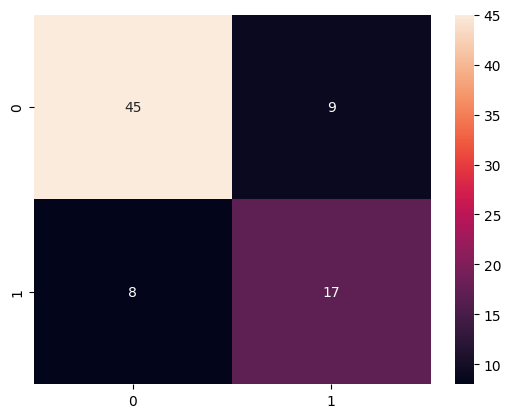

In [79]:
sb.heatmap(cm_lr, annot=True)

##### SVM

In [80]:
# questions - how do I choose the best kernel? 

svm = SVC(kernel='poly')
# svm=SVC(kernel='rbf')#default
# svm = SVC(kernel='linear')
svm.fit(X_train_scaled, Y_train)

SVC(kernel='poly')

In [81]:
ysvmpredicted = svm.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, ysvmpredicted)
print(cm_svm)

[[46  8]
 [11 14]]


<Axes: >

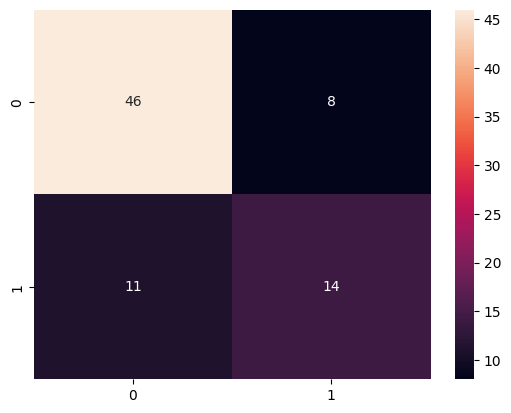

In [82]:
sb.heatmap(cm_svm, annot=True)

##### Decision Tree

In [83]:
# question - how does max_depth and entropy affect how a model trains
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [84]:
ydtpredicted = dt.predict(X_test_scaled)
dt_cm = confusion_matrix(y_test, ydtpredicted)
print(dt_cm)

[[40 14]
 [ 9 16]]


<Axes: >

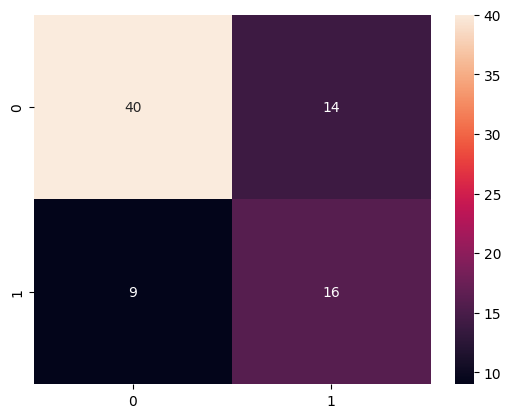

In [85]:
sb.heatmap(dt_cm, annot=True)

##### KNN

In [86]:
k=2
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [87]:
yknnpredicted = KNN.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, yknnpredicted)
print(knn_cm)

[[49  5]
 [10 15]]


<Axes: >

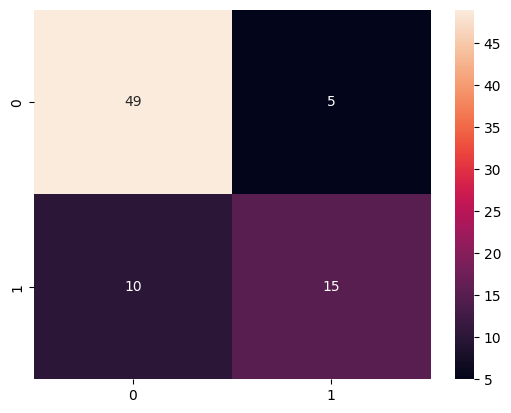

In [88]:
sb.heatmap(knn_cm, annot=True)

##### Random Forest

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [90]:
yrfpredicted = rf.predict(X_test_scaled)
print(yrfpredicted)
rf_cm = confusion_matrix(y_test, yrfpredicted)
print(rf_cm)

[1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0]
[[41 13]
 [ 7 18]]


<Axes: >

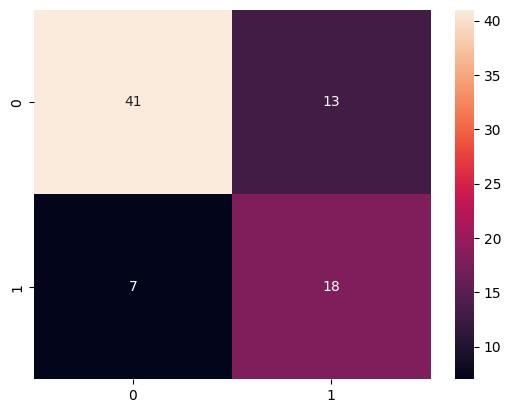

In [91]:
sb.heatmap(rf_cm, annot=True)

##### Gradient Boosting

In [92]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, Y_train)

GradientBoostingClassifier()

In [93]:
ygbpredicted = gb.predict(X_test_scaled)
print(ygbpredicted)
gb_cm = confusion_matrix(y_test, ygbpredicted)
print(gb_cm)


[1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0]
[[41 13]
 [ 8 17]]


<Axes: >

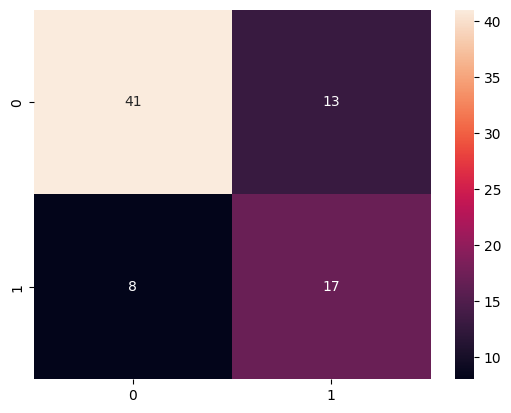

In [94]:
sb.heatmap(gb_cm, annot=True)

#### Model Evaluation

##### LR Model Performance

In [95]:
# LR model performance
print(classification_report(y_test, ylrpredicted))
f1_score_lr = f1_score(y_test, ylrpredicted, average='weighted')
accuracy_lr = accuracy_score(y_test, ylrpredicted)
recall_lr = recall_score(y_test, ylrpredicted)

print("Accuracy:",accuracy_lr )
print("F1_score:", f1_score_lr)
print("Recall:", recall_lr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.65      0.68      0.67        25

    accuracy                           0.78        79
   macro avg       0.75      0.76      0.75        79
weighted avg       0.79      0.78      0.79        79

Accuracy: 0.7848101265822784
F1_score: 0.785914271067471
Recall: 0.68


##### SVM Model Performance

In [96]:
print(classification_report(y_test, ysvmpredicted))
accuracy_svm = accuracy_score(y_test, ysvmpredicted)
f1_score_svm = f1_score(y_test, ysvmpredicted, average='weighted')
recall_svm = recall_score(y_test, ysvmpredicted)

print("Accuracy:",accuracy_svm )
print("F1_score:",f1_score_svm)
print("Recall", recall_svm)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        54
           1       0.64      0.56      0.60        25

    accuracy                           0.76        79
   macro avg       0.72      0.71      0.71        79
weighted avg       0.75      0.76      0.76        79

Accuracy: 0.759493670886076
F1_score: 0.7550680225067513
Recall 0.56


##### DT Model Performance

In [97]:
print(classification_report(y_test, ydtpredicted))
accuracy_dt = accuracy_score(y_test, ydtpredicted)
f1_score_dt = f1_score(y_test, ydtpredicted, average='weighted')
recall_dt = recall_score(y_test, ydtpredicted)

print("Accuracy:", accuracy_dt)
print("F1_score:",f1_score_dt)
print("Recall", recall_dt)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        54
           1       0.53      0.64      0.58        25

    accuracy                           0.71        79
   macro avg       0.67      0.69      0.68        79
weighted avg       0.73      0.71      0.72        79

Accuracy: 0.7088607594936709
F1_score: 0.7150278749148112
Recall 0.64


##### kNN Model Performance

In [98]:
print(classification_report(y_test, yknnpredicted))
accuracy_knn = accuracy_score(y_test, yknnpredicted)
f1_score_knn=f1_score(y_test, yknnpredicted, average='weighted')
recall_knn = recall_score(y_test, yknnpredicted)

print("Accuracy:", accuracy_knn)
print("F1_score:",f1_score_knn)
print("Recall", recall_knn)


              precision    recall  f1-score   support

           0       0.83      0.91      0.87        54
           1       0.75      0.60      0.67        25

    accuracy                           0.81        79
   macro avg       0.79      0.75      0.77        79
weighted avg       0.81      0.81      0.80        79

Accuracy: 0.810126582278481
F1_score: 0.8037787984018521
Recall 0.6


##### RF Model Performance

In [99]:
print(classification_report(y_test, yrfpredicted))
accuracy_rf = accuracy_score(y_test, yrfpredicted)
f1_score_rf=f1_score(y_test, yrfpredicted, average='weighted')
recall_rf = recall_score(y_test, yrfpredicted)

print("Accuracy:", accuracy_rf)
print("F1_score:",f1_score_rf)
print("Recall", recall_rf)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        54
           1       0.58      0.72      0.64        25

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.72        79
weighted avg       0.77      0.75      0.75        79

Accuracy: 0.7468354430379747
F1_score: 0.7529518136368473
Recall 0.72


##### GB Model Performance

In [100]:
print(classification_report(y_test, ygbpredicted))
accuracy_gb = accuracy_score(y_test, ygbpredicted)
f1_score_gb=f1_score(y_test, ygbpredicted, average='weighted')
recall_gb = recall_score(y_test, ygbpredicted)

print("Accuracy:", accuracy_gb)
print("F1_score:", f1_score_gb)
print("Recall: ", recall_gb)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        54
           1       0.57      0.68      0.62        25

    accuracy                           0.73        79
   macro avg       0.70      0.72      0.71        79
weighted avg       0.75      0.73      0.74        79

Accuracy: 0.7341772151898734
F1_score: 0.7398080597048275
Recall:  0.68


#### Model Performance Comparison

In [101]:
# compare f1 score
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
F1_score = [f1_score_lr, f1_score_svm, f1_score_dt, f1_score_knn,f1_score_rf,f1_score_gb]
compare_models_f1 = pd.DataFrame({ 'Algorithms': models, 'F1 Score': F1_score })
compare_models_f1.sort_values(by = 'F1 Score', ascending = False)

,Algorithms,F1 Score
3,KNN,0.803779
0,Logistic Regression,0.785914
1,SVM,0.755068
4,Random Forest,0.752952
5,Gradient boosted tree,0.739808
2,Decision Tree,0.715028


In [102]:
# compare accuracy score
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
accuracy_scores = [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn, accuracy_rf, accuracy_gb]
compare_models_accuracy = pd.DataFrame({ 'Algorithms': models, 'Accuracy Score': accuracy_scores })
compare_models_accuracy.sort_values(by = 'Accuracy Score', ascending = False)

,Algorithms,Accuracy Score
3,KNN,0.810127
0,Logistic Regression,0.784810
1,SVM,0.759494
4,Random Forest,0.746835
5,Gradient boosted tree,0.734177
2,Decision Tree,0.708861


In [103]:
# compare recall
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
recalll_score = [recall_lr, recall_svm, recall_dt, recall_knn, recall_rf, recall_gb]
compare_models_recall = pd.DataFrame({ 'Algorithms': models, 'Recall Score': recalll_score })
compare_models_recall.sort_values(by = 'Recall Score', ascending = False)

,Algorithms,Recall Score
4,Random Forest,0.72
0,Logistic Regression,0.68
5,Gradient boosted tree,0.68
2,Decision Tree,0.64
3,KNN,0.60
1,SVM,0.56


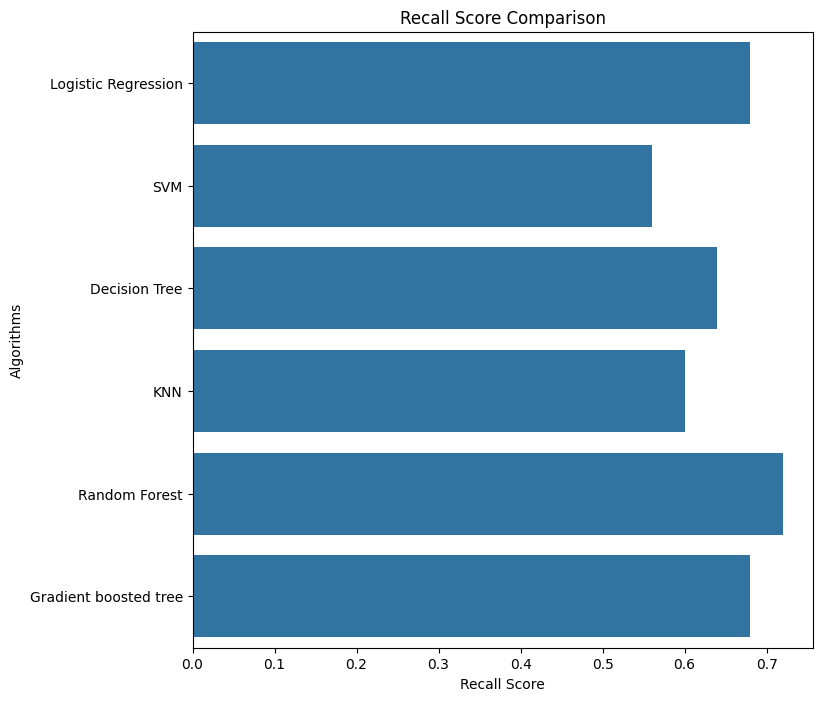

In [104]:
plt.figure(figsize=(8,8))
plt.title("Recall Score Comparison")
sb.barplot(x = 'Recall Score', y = 'Algorithms', data = compare_models_recall)
plt.show()

#### Other Evaluation Metrics - Precision, Specificity, and AUC Comparison

In [105]:
# calculate precision
precision_lr = precision_score(y_test, ylrpredicted)
precision_svm = precision_score(y_test, ysvmpredicted)
precision_dt = precision_score(y_test, ydtpredicted)
precision_knn = precision_score(y_test, yknnpredicted)
precision_rf = precision_score(y_test, yrfpredicted)
precision_gb = precision_score(y_test, ygbpredicted)

In [106]:
# specificity calculation
def calculate_specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

specificity_lr = calculate_specificity(confusion_matrix(y_test, ylrpredicted))
specificity_svm = calculate_specificity(confusion_matrix(y_test, ysvmpredicted))
specificity_dt = calculate_specificity(confusion_matrix(y_test, ydtpredicted))
specificity_knn = calculate_specificity(confusion_matrix(y_test, yknnpredicted))
specificity_rf = calculate_specificity(confusion_matrix(y_test, yrfpredicted))
specificity_gb = calculate_specificity(confusion_matrix(y_test, ygbpredicted))

In [107]:
# AUC calculation
auc_lr = roc_auc_score(y_test, ylrpredicted)
auc_svm = roc_auc_score(y_test, ysvmpredicted)
auc_dt = roc_auc_score(y_test, ydtpredicted)
auc_knn = roc_auc_score(y_test, yknnpredicted)
auc_rf = roc_auc_score(y_test, yrfpredicted)
auc_gb = roc_auc_score(y_test, ygbpredicted)

In [108]:
# Create a DataFrame to compare the metrics
metrics_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting'],
    'AUC': [auc_lr, auc_svm, auc_dt, auc_knn, auc_rf, auc_gb],
    'Precision': [precision_lr, precision_svm, precision_dt, precision_knn, precision_rf, precision_gb],
    'Specificity': [specificity_lr, specificity_svm, specificity_dt, specificity_knn, specificity_rf, specificity_gb],
})

metrics_comparison.sort_values(by='AUC', ascending=False)

,Model,AUC,Precision,Specificity
0,Logistic Regression,0.756667,0.653846,0.833333
3,KNN,0.753704,0.750000,0.907407
4,Random Forest,0.739630,0.580645,0.759259
5,Gradient Boosting,0.719630,0.566667,0.759259
1,SVM,0.705926,0.636364,0.851852
2,Decision Tree,0.690370,0.533333,0.740741


#### ANN

##### Using sci-kit learn's MLP

In [109]:
# creating neural network classifier using multi-layer perceptron from scikit-learn
# activation funciton - relu
# we're using one hidden layer with 100 neurons
# we're using adam optimization algorithm
# random state fixes the randomnes so that the results are reproducable
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100), solver='adam', random_state=42)
mlp.fit(X_train_scaled, Y_train)
ymlp_pred = mlp.predict(X_test_scaled)
# ymlp_pred = np.round(ymlp_pred).astype(int)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, ymlp_pred)))
print('f1-score  : {:.4f}'.format(f1_score(y_test, ymlp_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, ymlp_pred)))
print('Recall    : {:.4f}'.format(recall_score(ymlp_pred, y_test)))
print(classification_report(y_test, ymlp_pred))

Accuracy Score: 0.7848
f1-score  : 0.6667
Precision : 0.6538
Recall    : 0.6538
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.65      0.68      0.67        25

    accuracy                           0.78        79
   macro avg       0.75      0.76      0.75        79
weighted avg       0.79      0.78      0.79        79



/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lee

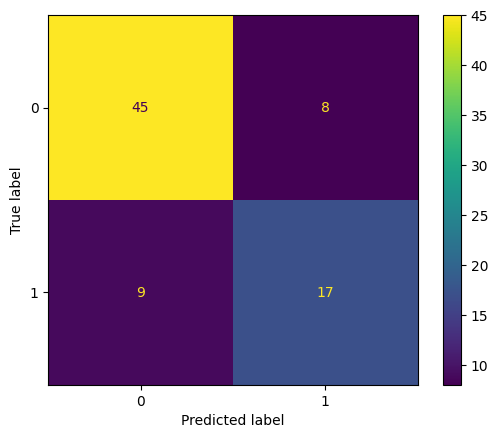

In [110]:
cfm_mlp = confusion_matrix(ymlp_pred, y_test)
ConfusionMatrixDisplay(cfm_mlp).plot()

##### Creating Neural Network
I'm building a feed-forward neural network using Keras (from TensorFlow).
A sequential model stacks layers one after another following a simple linear architecture

In [111]:
ann_model = Sequential()

In [112]:
# first hidden layer
# has 64 neurons
# each input sample has 6 features

# each of the 64 neurons receives all 8 inputs, has 8 weights + 1 bias, and applies relu activation function
ann_model.add(Dense(64, activation='relu', input_dim=8))

/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
# another fully connected layer with 64 neurons, relu activation, and it automatically takes input from the previous layer
ann_model.add(Dense(64, activation='relu'))

In [114]:
ann_model.add(Dense(64, activation='relu'))

In [115]:
# output layer
# sigmoid outputs probability between 0 and 1
ann_model.add(Dense(1, activation='sigmoid'))

In [116]:
# binary_crossentropy corrects loss for binary classification
# metrics['accuracy'] tracks performance
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [117]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
history = ann_model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6543 - loss: 0.6818 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6835 - val_loss: 0.6656
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7024 - loss: 0.6527 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6835 - val_loss: 0.6529
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6595 - loss: 0.6484 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6835 - val_loss: 0.6363
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.5455 - Recall: 0.0066 - accuracy: 0.6890 - loss: 0.6211 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6835 - val_loss: 0.6118
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7965 - Recall: 0.1093 - accuracy: 0.6791 

In [119]:
ann_model_results = ann_model.evaluate(X_test_scaled, y_test)

print("Loss:", ann_model_results[0])
print("Accuracy:", ann_model_results[1])
print("Precision:", ann_model_results[2])
print("Recall:", ann_model_results[3])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.5991 - Recall: 0.7294 - accuracy: 0.7713 - loss: 0.4884
Loss: 0.46249523758888245
Accuracy: 0.7848101258277893
Precision: 0.6333333253860474
Recall: 0.7599999904632568


In [120]:
# full metrics

# Get probabilities
y_pred_prob = ann_model.predict(X_test_scaled)

# Convert to 0 or 1
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.63      0.76      0.69        25

    accuracy                           0.78        79
   macro avg       0.76      0.78      0.76        79
weighted avg       0.80      0.78      0.79        79

[[43 11]
 [ 6 19]]


#### Data Augmentation
I'm using data augmentation to balance the dataset which eventually reduces bias 
Augmentation is done on the training dataset, after pre-processing